In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import warnings
import datetime as dt
import math

In [3]:
from IPython.core.display import HTML

def nan_counts_all(df_dict):
    pd.set_option('display.max_rows', 50)
    table_list = []
    for key in df_dict:
        table_list.append(pd.DataFrame(df_dict[key].isna().sum(), columns=[key]))
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>")

def nunqiue_all(df_dict):
    pd.set_option('display.max_rows', 50)
    table_list = []
    for key in df_dict:
        table_list.append(pd.DataFrame(df_dict[key].nunique(), columns=[key]))
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>")

def value_counts_all(df, columns):
    pd.set_option('display.max_rows', 50)
    table_list = []
    for col in columns:
        table_list.append(pd.DataFrame(df[col].value_counts()))
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>")

In [4]:
%%time

DATA_PATH = "./Kaggle/"

topic = pd.read_csv(DATA_PATH + "topics.csv")
content = pd.read_csv(DATA_PATH + "content.csv")
correlations = pd.read_csv(DATA_PATH + "correlations.csv")
sub = pd.read_csv(DATA_PATH + "sample_submission.csv")

CPU times: user 11.4 s, sys: 1.76 s, total: 13.2 s
Wall time: 16.2 s


In [5]:
display(content.head())
display(topic.head())
display(correlations.head())
display(sub.head())

,id,title,description,kind,text,language,copyright_holder,license
0,c_00002381196d,"Sumar números de varios dígitos: 48,029+233,930","Suma 48,029+233,930 mediante el algoritmo está...",video,NaN,es,NaN,NaN
1,c_000087304a9e,Trovare i fattori di un numero,Sal trova i fattori di 120.\n\n,video,NaN,it,NaN,NaN
2,c_0000ad142ddb,Sumar curvas de demanda,Cómo añadir curvas de demanda\n\n,video,NaN,es,NaN,NaN
3,c_0000c03adc8d,Nado de aproximação,Neste vídeo você vai aprender o nado de aproxi...,document,\nNado de aproximação\nSaber nadar nas ondas ...,pt,Sikana Education,CC BY-NC-ND
4,c_00016694ea2a,geometry-m3-topic-a-overview.pdf,geometry-m3-topic-a-overview.pdf,document,Estándares Comunes del Estado de Nueva York\n\...,es,Engage NY,CC BY-NC-SA


,id,title,description,channel,category,level,language,parent,has_content
0,t_00004da3a1b2,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True
1,t_000095e03056,Unit 3.3 Enlargements and Similarities,NaN,b3f329,aligned,2,en,t_aa32fb6252dc,False
2,t_00068291e9a4,Entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,True
3,t_00069b63a70a,Transcripts,NaN,6e3ba4,source,3,en,t_4054df11a74e,True
4,t_0006d41a73a8,Графики на експоненциални функции (Алгебра 2 н...,Научи повече за графиките на сложните показате...,000cf7,source,4,bg,t_e2452e21d252,True


,topic_id,content_ids
0,t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...
1,t_00068291e9a4,c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c...
2,t_00069b63a70a,c_11a1dc0bfb99
3,t_0006d41a73a8,c_0c6473c3480d c_1c57a1316568 c_5e375cf14c47 c...
4,t_0008768bdee6,c_34e1424229b4 c_7d1a964d66d5 c_aab93ee667f4


,topic_id,content_ids
0,t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...
1,t_00068291e9a4,c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c...
2,t_00069b63a70a,c_11a1dc0bfb99
3,t_0006d41a73a8,c_0c6473c3480d c_1c57a1316568 c_5e375cf14c47 c...
4,t_4054df11a74e,c_3695c5dc1df6 c_f2d184a98231


In [6]:
print("content shape:", content.shape)
print("topic shape:", topic.shape)
print("correlations shape:", correlations.shape)
print("sub shape:", sub.shape)

content shape: (154047, 8)
topic shape: (76972, 9)
correlations shape: (61517, 2)
sub shape: (5, 2)


In [7]:
print("content nan value sum:", content.isna().sum().sum())
print("topic nan value sum:", topic.isna().sum().sum())
print("correlations nan value sum:", correlations.isna().sum().sum())
print("sub nan value sum:", sub.isna().sum().sum())

content nan value sum: 306850
topic nan value sum: 42192
correlations nan value sum: 0
sub nan value sum: 0


In [8]:
df_dict = {
    'Content':content,
    'Topic':topic
}
nan_counts_all(df_dict)

,Content
id,0
title,9
description,64591
kind,0
text,80012
language,0
copyright_holder,82226
license,80012
,Topic
id,0


In [9]:
print("content dublicated value sum:", content.duplicated().sum().sum())
print("topic dublicated value sum:", topic.duplicated().sum().sum())
print("correlations dublicated value sum:", correlations.duplicated().sum().sum())
print("sub dublicated value sum:", sub.duplicated().sum().sum())

content dublicated value sum: 0
topic dublicated value sum: 0
correlations dublicated value sum: 0
sub dublicated value sum: 0


In [10]:
nunqiue_all(df_dict)

,Content
id,154047
title,130937
description,76305
kind,5
text,70687
language,27
copyright_holder,148
license,7
,Topic
id,76972


In [11]:
value_counts_all(content, ["kind", "language", "license"])

,kind
video,61487
document,33873
html5,32563
exercise,25925
audio,199
,language
en,65939
es,30844
fr,10682
pt,10435


In [12]:
value_counts_all(topic, ["category", "level", "language", "has_content"])

,category
source,43487
supplemental,19368
aligned,14117
,level
4,38810
3,14898
5,9744
6,6210
2,4874
1,1104


In [13]:
def cat_cat_dist(data=None, feat1="", feat2="", feat1_lim="all", h=True, figsize=(16, 4), title="", title_fontsize=20, rotate=False, cut_xlabel=False):
    data_copy = data.copy()
    data_copy.loc[:, "count"] = 1
    if feat1_lim != "all":
        feat1_lim_value = data_copy[feat1].value_counts().index[:feat1_lim]
        data_copy = data_copy.loc[data_copy[feat1].isin(feat1_lim_value), :]
        if cut_xlabel:
            data_copy[feat1] = data_copy[feat1].str[:int((1/feat1_lim)*400)]
    data_copy = data_copy.groupby([feat1, feat2], as_index=False).agg({"count":"sum"})
    data_copy_div = data_copy.groupby([feat1], as_index=False).agg({"count":"sum"})
    data_copy_div.columns = [feat1, "div"]
    data_copy = data_copy.merge(data_copy_div, on=feat1)
    data_copy["normalized_count"] = data_copy["count"] / data_copy["div"] 
    data_copy.sort_values("count", inplace=True, ascending=False)
    if h:
        fig, axes = plt.subplots(2, figsize=figsize)
        fig.suptitle(title, fontsize=title_fontsize)
        sns.barplot(data=data_copy, x=feat1, y="count", hue=feat2, ax=axes[0])
        sns.barplot(data=data_copy, x=feat1, y="normalized_count", hue=feat2, ax=axes[1])
        if rotate:
            x_labels = data_copy[feat1].unique()
            axes[0].set_xticklabels(x_labels, rotation = 45)
            axes[1].set_xticklabels(x_labels, rotation = 45)
            fig.tight_layout()
    else:
        fig, axes = plt.subplots(1, 2, figsize=figsize)
        fig.suptitle(title, fontsize=title_fontsize)
        sns.barplot(data=data_copy, x=feat1, y="count", hue=feat2, ax=axes[0])
        sns.barplot(data=data_copy, x=feat1, y="normalized_count", hue=feat2, ax=axes[1])
        if rotate:
            x_labels = data_copy[feat1].unique()
            axes[0].set_xticklabels(x_labels, rotation = 45)
            axes[1].set_xticklabels(x_labels, rotation = 45)
            fig.tight_layout()

In [14]:
content_ids_df = pd.DataFrame()
content_ids = correlations["content_ids"].str.split(" ")
content_ids_df["topic_id"] = correlations["topic_id"].values
content_ids_df["content_ids"] = content_ids
content_ids_df["content_ids_len"] = content_ids.str.len()
content_ids_df = content_ids_df.merge(topic[["id", "has_content"]], left_on="topic_id", right_on="id")

content_ids_df.head()

,topic_id,content_ids,content_ids_len,id,has_content
0,t_00004da3a1b2,"[c_1108dd0c7a5d, c_376c5a8eb028, c_5bc0e1e2cba...",4,t_00004da3a1b2,True
1,t_00068291e9a4,"[c_639ea2ef9c95, c_89ce9367be10, c_ac1672cdcd2...",4,t_00068291e9a4,True
2,t_00069b63a70a,[c_11a1dc0bfb99],1,t_00069b63a70a,True
3,t_0006d41a73a8,"[c_0c6473c3480d, c_1c57a1316568, c_5e375cf14c4...",5,t_0006d41a73a8,True
4,t_0008768bdee6,"[c_34e1424229b4, c_7d1a964d66d5, c_aab93ee667f4]",3,t_0008768bdee6,True


In [15]:
content_ids_df.groupby("has_content").agg({"content_ids_len":["mean", "median"]})

content_ids_len       
                       mean median
has_content                       
True               4.550271    3.0

In [16]:
fig = plt.figure(figsize=(16, 12)) # initialize figure
axes = [None for _ in range(3)] # list to save many ax for setting parameter in each
axes[0] = plt.subplot2grid((3,4), (0,0), colspan=1, rowspan=2)
axes[1] = plt.subplot2grid((3,4), (0,1), colspan=2)
axes[2] = plt.subplot2grid((3,4), (1,1), colspan=2)

# Chart 0
content_dict = {content_id: 0 for content_id in content["id"]}
for index, row in content_ids_df.iterrows():
    for content_id in row["content_ids"]:
        content_dict[content_id]+=1

content_ids_count_series = pd.Series(content_dict)
content_ids_count_series.sort_values(inplace=True, ascending=False)

content_ids_count_df = content_ids_count_series.to_frame()
content_ids_count_df.reset_index(inplace=True)
content_ids_count_df.columns = ["content_id", "count"]

content_ids_count_df.loc[content_ids_count_df["count"]<=49, ["content_id", "count"]] = ["Others", 49]
content_ids_count_df.drop_duplicates(inplace=True)

axes[0].barh(content_ids_count_df["content_id"][::-1], content_ids_count_df["count"][::-1]);
axes[0].set_title("Content_id Counts")
axes[0].set_xlabel("Counts")
axes[0].set_ylabel("Content_id")

# Chart 1
axes[1].pie(content_ids_count_df["count"], labels = content_ids_count_df["content_id"],  autopct='%.0f%%');
axes[1].set_title("Content_id Pie Chart")

# Chart 2
content_ids_len_counts = content_ids_df["content_ids_len"].value_counts()[:50]
axes[2].bar(content_ids_len_counts.index, content_ids_len_counts.values)
axes[2].set_title("Content_ids Len Counts")
axes[2].set_xlabel("Content_ids Len")
axes[2].set_ylabel("Counts");

fig.tight_layout()

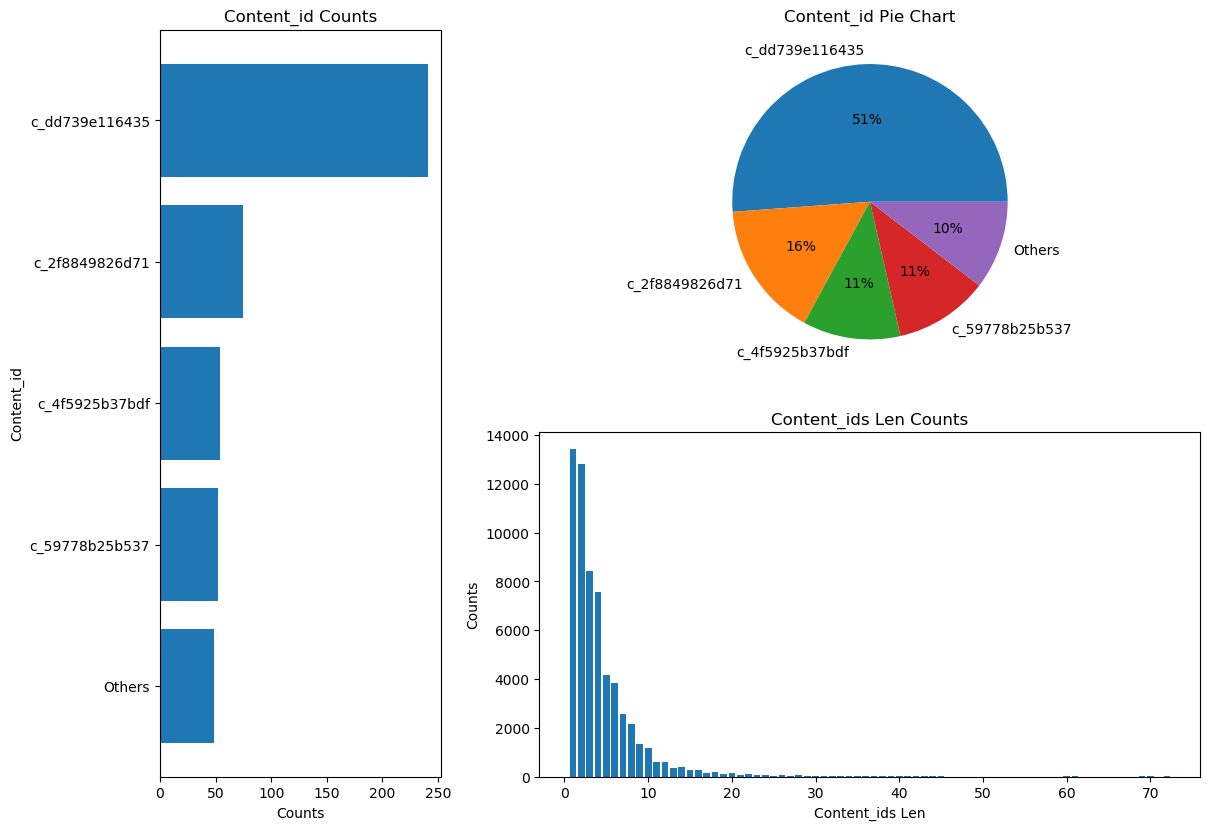

In [18]:
plt.show()

In [19]:
content.merge(content_ids_count_df, left_on="id", right_on="content_id")

,id,title,description,kind,text,language,copyright_holder,license,content_id,count
0,c_2f8849826d71,InfoPage,NaN,html5,This open text is disseminated via the Open Ed...,en,CSU and Merlot,CC BY-NC-SA,c_2f8849826d71,75
1,c_4f5925b37bdf,Index,NaN,html5,NaN,en,NaN,NaN,c_4f5925b37bdf,54
2,c_59778b25b537,Pasos siguientes,Descubra los pasos siguientes y recursos adici...,html5,Para recibir el certificado que necesita para ...,es,HP LIFE,CC BY,c_59778b25b537,52
3,c_dd739e116435,বই,NaN,document,NaN,bn,NaN,NaN,c_dd739e116435,241


In [20]:
def target_content_dist(feature="kind", ncols=3, h=False, figsize=(16,8)):
    feature_unique = content[feature].unique()
    feat_dict = {v: {v_inner:0 for v_inner in feature_unique} for v in feature_unique}
    
    content_id_map = content.set_index("id").to_dict()[feature]
    for index, row in content_ids_df.iterrows():
        row_values = []
        for content_id in row["content_ids"]:
            row_values.append(content_id_map[content_id])
        for v_uniq in set(row_values):
            for f_uniq in feature_unique:
                feat_dict[v_uniq][f_uniq] += row_values.count(f_uniq)
            feat_dict[v_uniq][v_uniq] -= 1
    
    nrows = int((len(feature_unique)+1) / ncols)
    if (len(feature_unique)+1) % ncols != 0:
        nrows += 1
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    for index, ax in enumerate(axes.ravel()[:len(feature_unique)+1]):
        if h:
            if index==0:
                feature_count = content[feature].value_counts()
                ax.barh(feature_count.index, feature_count.values)
                ax.set_title(f"{feature} counts")
                ax.set_ylabel("count")
                ax.set_xlabel(feature)
            else:
                feat_name = feature_unique[index-1]
                ax.barh(list(feat_dict[feat_name].keys()), list(feat_dict[feat_name].values()))
                ax.set_title(feat_name)
                ax.set_ylabel("count")
                ax.set_xlabel(feature)
        else:
            if index==0:
                feature_count = content[feature].value_counts()
                ax.bar(feature_count.index, feature_count.values)
                ax.set_title(f"{feature} counts")
                ax.set_ylabel("count")
                ax.set_xlabel(feature)
            else:
                feat_name = feature_unique[index-1]
                ax.bar(feat_dict[feat_name].keys(), feat_dict[feat_name].values())
                ax.set_title(feat_name)
                ax.set_ylabel("count")
                ax.set_xlabel(feature)
    for ax in axes.ravel()[len(feature_unique)+1:]:
        ax.set_visible(False)
    fig.tight_layout()

In [22]:
def content_ids_len_analysis(feature_name="kind", ncols=3, figsize=(16,8)):
    from matplotlib.offsetbox import AnchoredText
    
    feature_unique = content[feature_name].unique()
    df_content_ids_analysis = pd.DataFrame()
    for index, row in content_ids_df.iterrows():
        feature_dict = {feature_id: 0 for feature_id in feature_unique}
        content_part = content.loc[content["id"].isin(row["content_ids"]), :]
        value_counts = content_part[feature_name].value_counts()
        for v in feature_unique:
            try:
                feature_dict[v] = value_counts[v]
            except:
                feature_dict[v] = 0
        df_content_ids_analysis = df_content_ids_analysis.append(feature_dict, ignore_index=True)
    df_content_ids_analysis["content_ids_len"] = content_ids_df["content_ids_len"].values
    
    nrows = int((len(feature_unique)+1) / ncols)
    if (len(feature_unique)+1) % ncols != 0:
        nrows += 1
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    for index, (ax, feature) in enumerate(zip(axes.ravel()[:len(feature_unique)], feature_unique)):
        corr = df_content_ids_analysis[feature].corr(df_content_ids_analysis["content_ids_len"])
        scatter_kws = dict(
            alpha=0.75,
            s=3,
        )
        line_kws = dict(color='C3', )
        ax = sns.regplot(x=df_content_ids_analysis[feature],
                         y=df_content_ids_analysis["content_ids_len"],
                         scatter_kws=scatter_kws,
                         line_kws=line_kws,
                         lowess=True,
                         ax=ax)
        at = AnchoredText(
            f"{corr:.2f}",
            prop=dict(size="large"),
            frameon=True,
            loc="upper left",
        )
        at.patch.set_boxstyle("square, pad=0.0")
        ax.add_artist(at)
        
        ax.set_title(f"{feature} - content_ids_len scatter plot")
        ax.set_ylabel("content_ids_len")
        ax.set_xlabel(feature)
    for ax in axes.ravel()[len(feature_unique):]:
        ax.set_visible(False)
    fig.tight_layout()

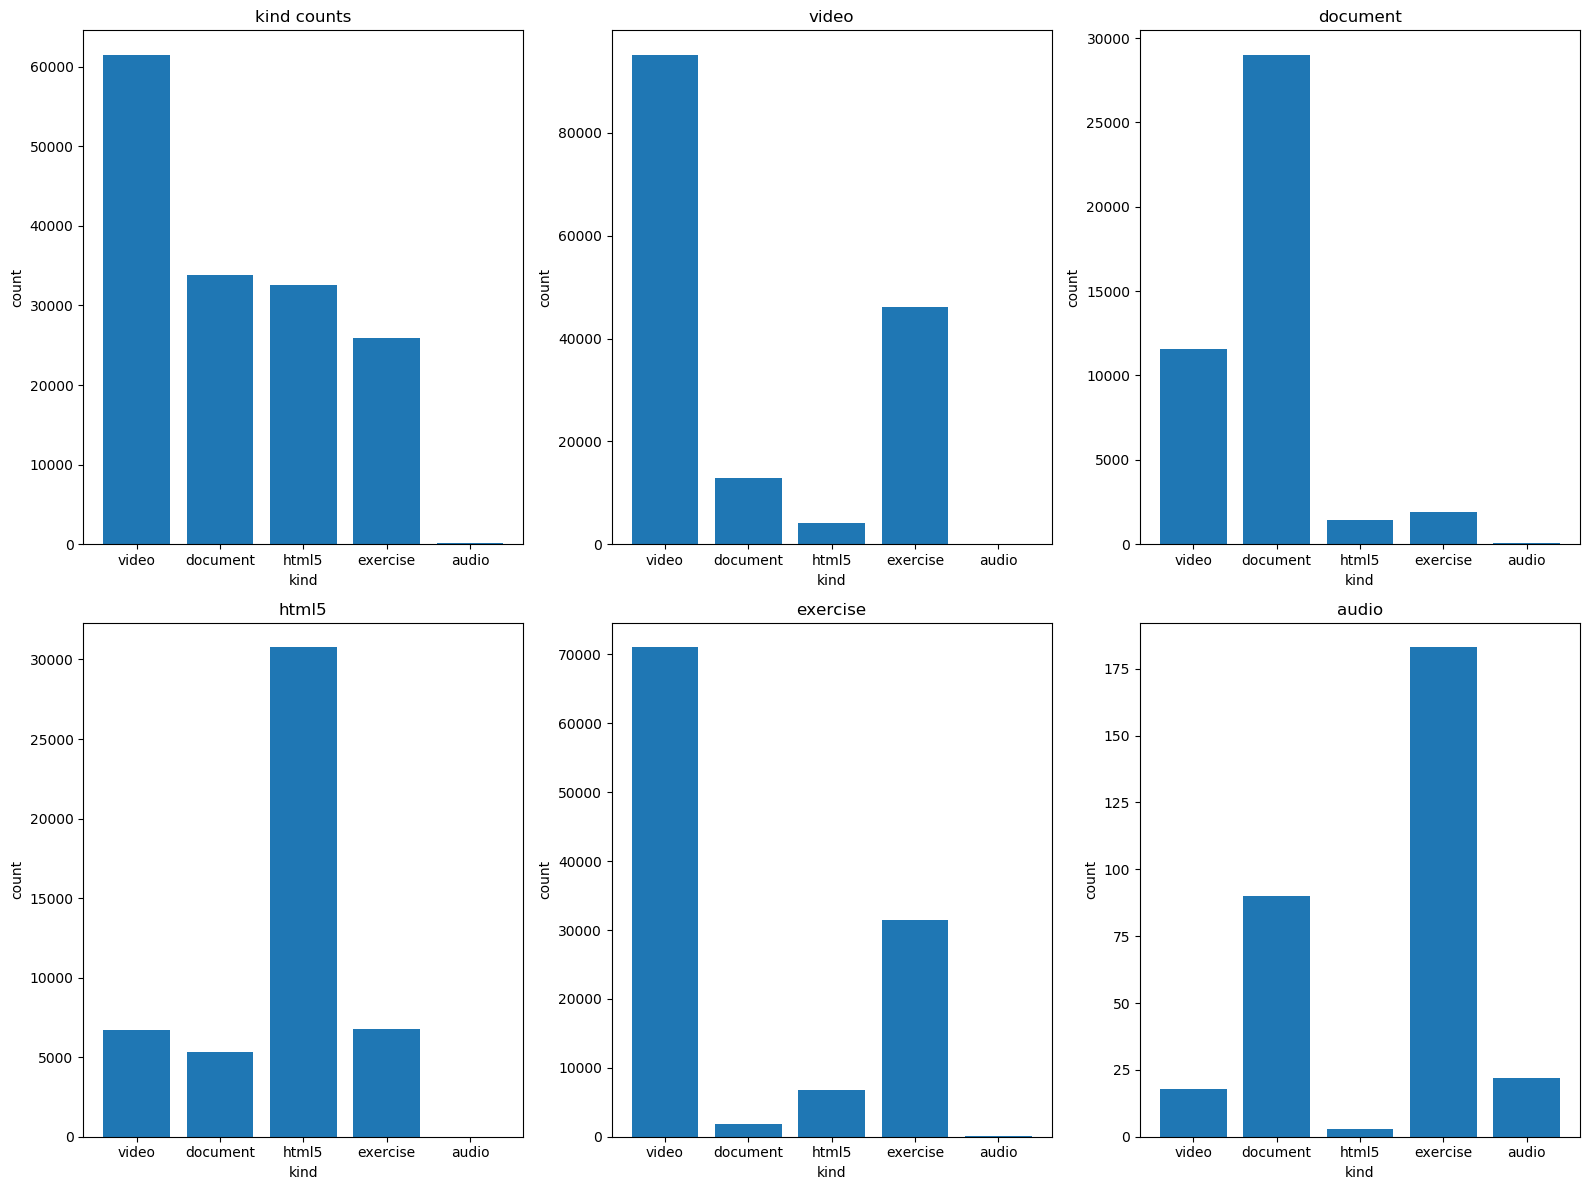

In [23]:
target_content_dist(feature="kind", ncols=3, figsize=(16,12))
plt.show()

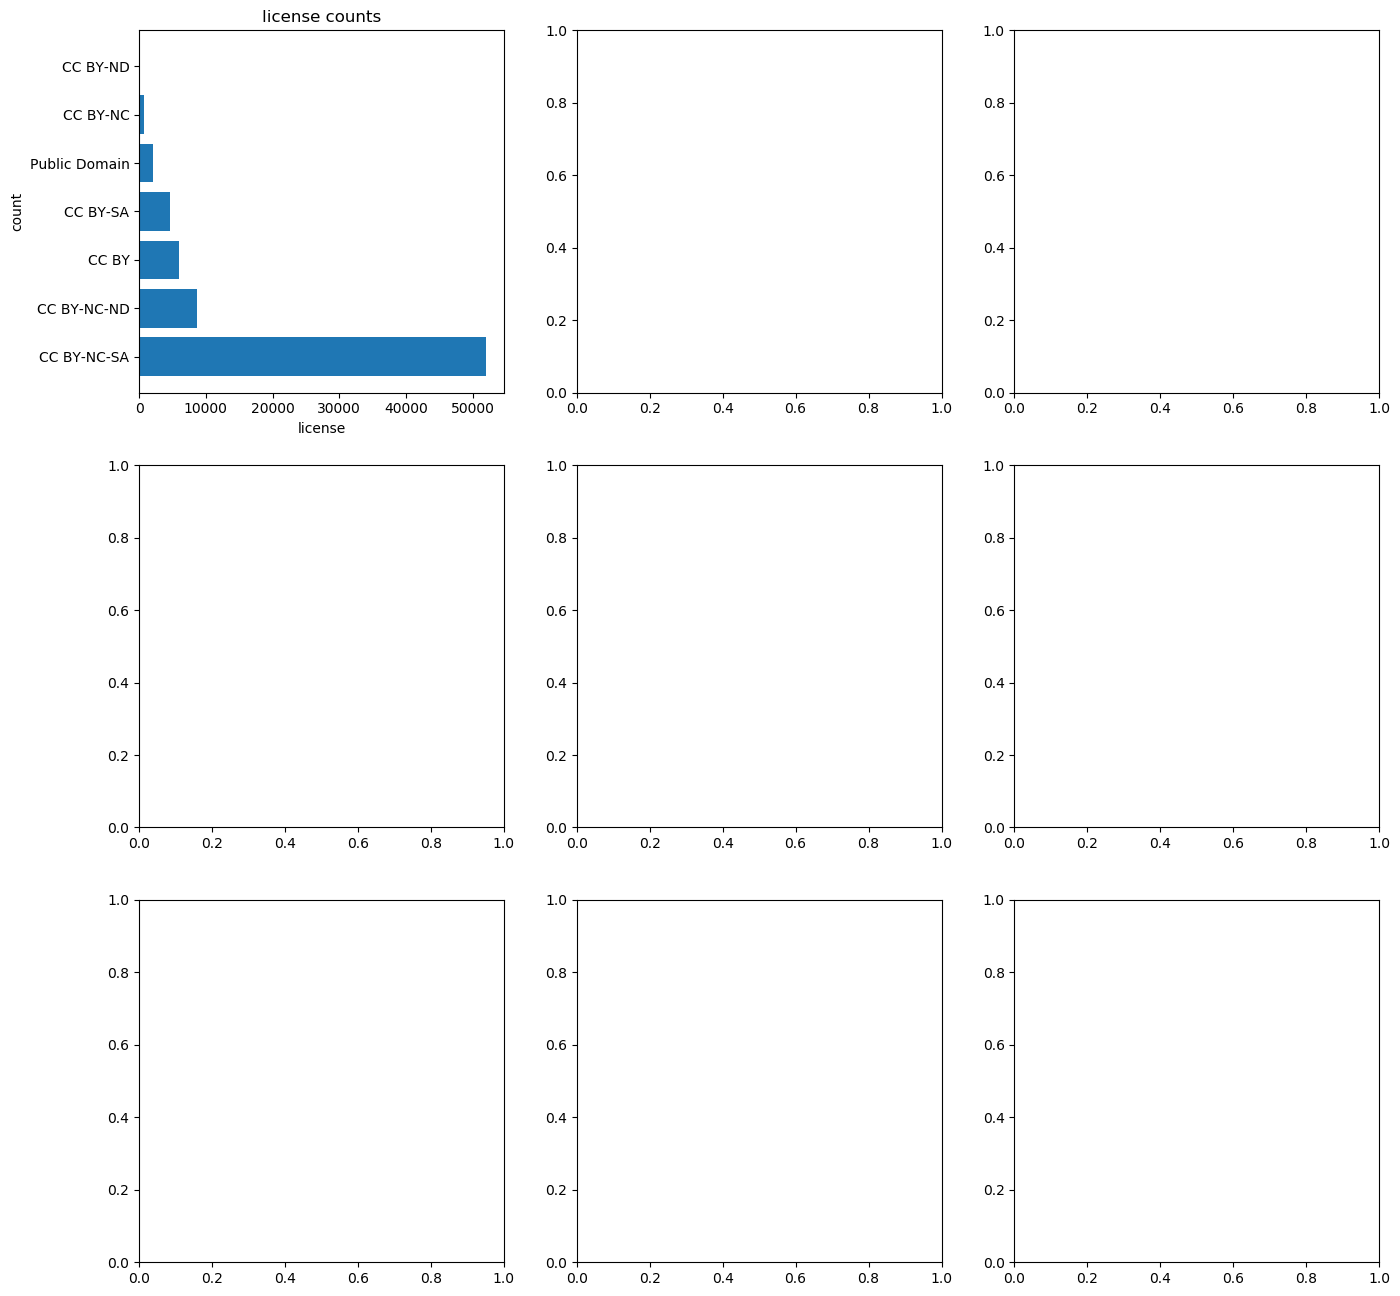

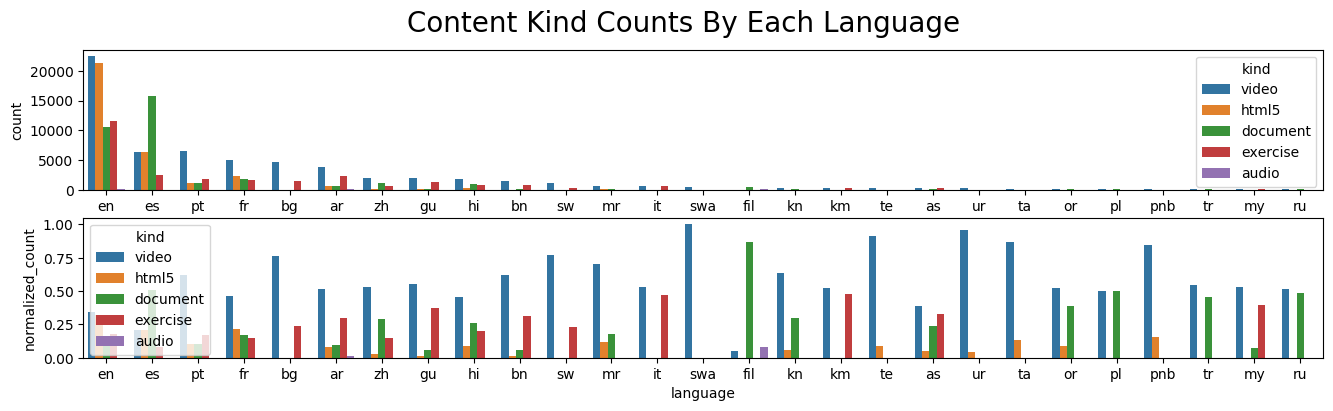

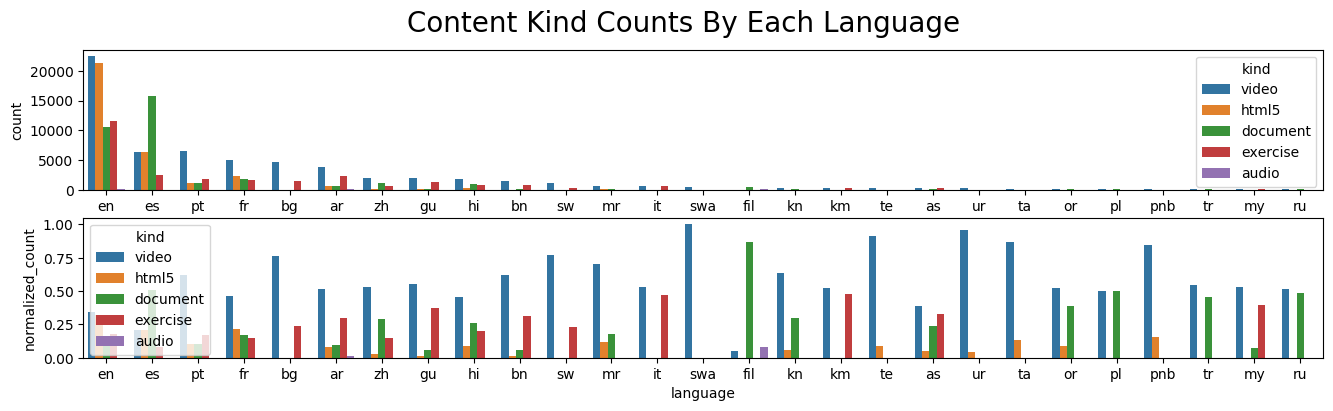

In [26]:
cat_cat_dist(data=content, feat1="language", feat2="kind", title="Content Kind Counts By Each Language")
plt.show()

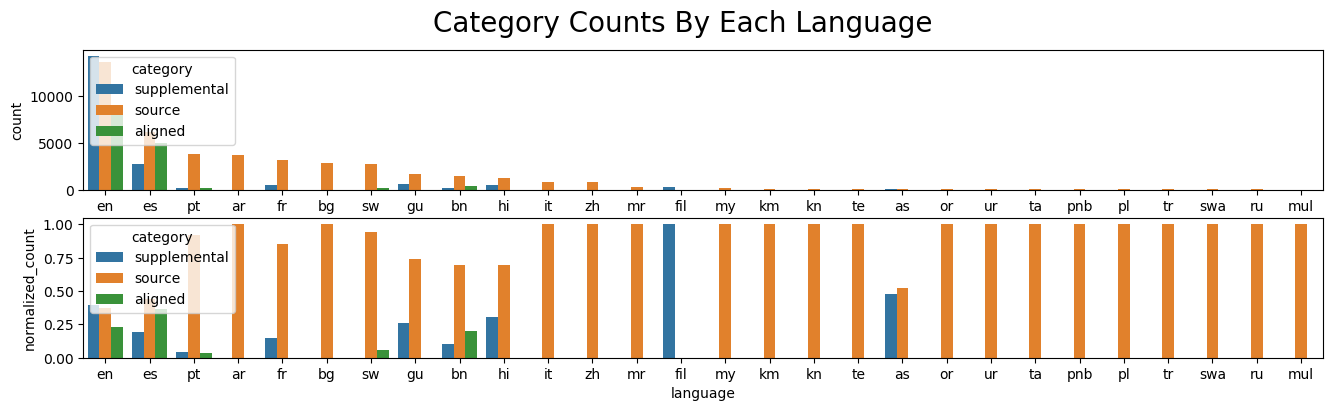

In [27]:
cat_cat_dist(data=topic, feat1="language", feat2="category", title="Category Counts By Each Language")
plt.show()